In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import time

# 크롤링 이용한 지하철 호선 영문명 표기 함수 생성

In [9]:
#카카오 i 번역기에 단어를 입력하면 자동으로 영어 번역해주는 함수

def translate(word):
    chromedriver = 'C:/Users/swnam/coding_part_2/chromedriver_win32/chromedriver.exe'
    driver = webdriver.Chrome(service = Service(chromedriver))
    driver.get('https://translate.kakao.com/')
    time.sleep(1)
    window = driver.find_element(By.CSS_SELECTOR, 'div.layer_foot span.ico_translation')
    window.click()
    time.sleep(1)
    box = driver.find_element(By.CSS_SELECTOR, 'div.box_tf > div.tf_translation')
    box.send_keys(word)
    time.sleep(1)
    eng_word = driver.find_element(By.CSS_SELECTOR, '#result')
    eng_word = eng_word.text
    driver.quit()
    return eng_word

In [10]:
a = translate('신림선')

In [11]:
print(a)

sillim line


In [12]:
df_line = pd.read_csv('df_line.csv', encoding = 'utf-8-sig')
df_subway = pd.read_csv('df_subway.csv', encoding = 'utf-8-sig')

# 9호선 2단계 개통

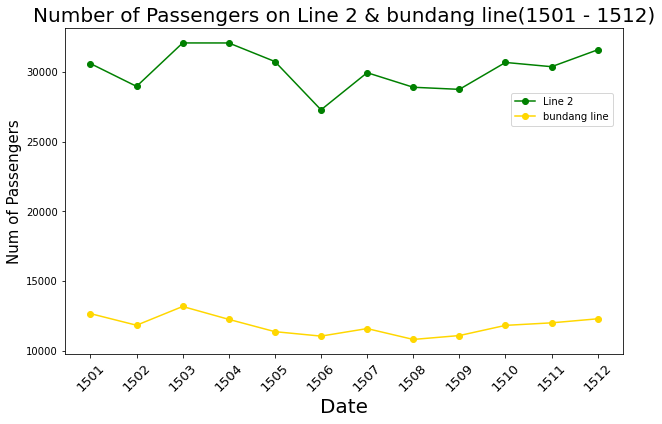

In [13]:
#호선 영문명 정리
Line_2 = translate('2호선')
Line_B = translate('분당선')
# 2호선 데이터프레임 제작
df_2_9 = df_subway[df_subway['역명'].isin(['선릉','삼성','신천','종합운동장','잠실새내','잠실','잠실나루','강변','구의','건대입구'])]
df_2_9 = df_2_9.set_index('역명')
c_list = list(df_2_9.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_2_9.columns = new_c_list
mean_data = list(df_2_9.mean().values)
df_2_9.loc[len(df_2_9)] = mean_data # 월별 역 승하차 평균 인원
df_2_9.rename(index = {10: Line_2}, inplace = True)
df_2_9 = df_2_9.astype('int') # 타입 바꿔줌
df_2_9_sum = df_2_9.iloc[[-1]].T

# 분당선 데이터프레임 제작
df_b_9 = df_subway[df_subway['역명'].isin(['압구정로데오','강남구청','선정릉'])]
df_b_9 = df_b_9.set_index('역명')
c_list = list(df_b_9.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_b_9.columns = new_c_list
mean_data = list(df_b_9.mean().values)
df_b_9.loc[len(df_b_9)] = mean_data # 월별 역 승하차 평균 인원
df_b_9.rename(index = {3: Line_B}, inplace = True)
df_b_9 = df_b_9.astype('int') # 타입 바꿔줌
df_b_9_sum = df_b_9.iloc[[-1]].T

#데이터 merge

df_9_2nd_sum = pd.merge(df_2_9_sum, df_b_9_sum, how = 'outer', left_index = True, right_index = True).loc['1501':'1512']

#그래프 설정
plt.figure(figsize = (10, 6)) #크기 설정

plt.plot(df_9_2nd_sum.index, df_9_2nd_sum[Line_2], marker = 'o', color = 'green')
plt.plot(df_9_2nd_sum.index, df_9_2nd_sum[Line_B], marker = 'o', color = 'gold')

plt.title('Number of Passengers on {} & {}(1501 - 1512)'.format(Line_2,Line_B), fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num of Passengers', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13)
plt.legend(df_9_2nd_sum.columns, loc = (0.8, 0.7))

plt.show()

# 9호선 3단계 개통

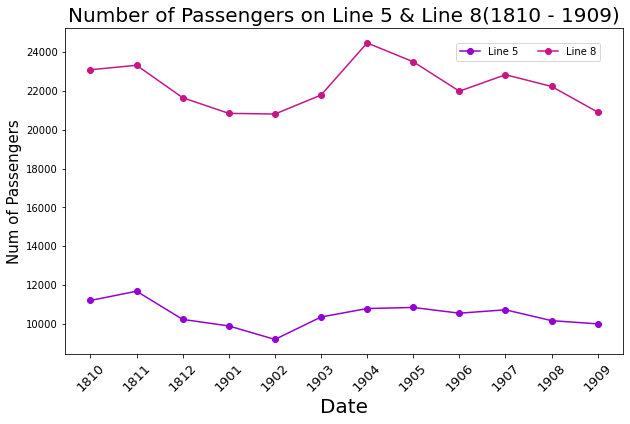

In [14]:
#호선 영문명 정리
Line_5 = translate('5호선')
Line_8 = translate('8호선')

# 8호선 데이터프레임 제작
df_8_9 = df_subway[df_subway['역명'].isin(['잠실','석촌','송파'])]
df_8_9 = df_8_9.set_index('역명')
c_list = list(df_8_9.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_8_9.columns = new_c_list
mean_data = list(df_8_9.mean().values)
df_8_9.loc[len(df_8_9)] = mean_data # 월별 역 승하차 평균 인원
df_8_9.rename(index = {3: Line_8}, inplace = True)
df_8_9 = df_8_9.astype('int') # 타입 바꿔줌
df_8_9_sum = df_8_9.iloc[[-1]].T

#5호선 데이터프레임 제작
df_5_9 = df_subway[df_subway['역명'].isin(['강동','둔촌동','올림픽공원','방이'])]
df_5_9 = df_5_9.set_index('역명')
c_list = list(df_5_9.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_5_9.columns = new_c_list
mean_data = list(df_5_9.mean().values)
df_5_9.loc[len(df_5_9)] = mean_data # 월별 역 승하차 평균 인원
df_5_9.rename(index = {4: Line_5}, inplace = True)
df_5_9 = df_5_9.astype('int') # 타입 바꿔줌
df_5_9_sum = df_5_9.iloc[[-1]].T

df_9_3rd_sum = pd.merge(df_5_9_sum, df_8_9_sum, how = 'outer', left_index = True, right_index = True).loc['1810':'1909']

#그래프 설정
plt.figure(figsize = (10, 6))

plt.plot(df_9_3rd_sum.index, df_9_3rd_sum[Line_5], marker = 'o', color = 'darkviolet')
plt.plot(df_9_3rd_sum.index, df_9_3rd_sum[Line_8], marker = 'o', color = 'mediumvioletred')

plt.title('Number of Passengers on {} & {}(1810 - 1909)'.format(Line_5,Line_8), fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num of Passengers', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13)
plt.legend(df_9_3rd_sum.columns, loc = (0.7, 0.9), ncol = 2)

plt.show()

# 우이신설선 개통

In [31]:
Line_1 = translate('1호선')
Line_2 = translate('2호선')
Line_4 = translate('4호선')
Line_6 = translate('6호선')
#1호선 데이터프레임
df_1_u = df_subway[df_subway['역명'].isin(['동묘앞','신설동','제기동','청량리'])]
df_1_u = df_1_u.set_index('역명')
c_list = list(df_1_u.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_1_u.columns = new_c_list
mean_data = list(df_1_u.mean().values)
df_1_u.loc[len(df_1_u)] = mean_data # 월별 역 승하차 평균 인원
df_1_u.rename(index = {4: Line_1}, inplace = True)
df_1_u = df_1_u.astype('int') # 타입 바꿔줌
df_1_u_sum = df_1_u.iloc[[-1]].T

#2호선 데이터프레임
df_2_u = df_subway[df_subway['역명'].isin(['신설동','용두','신답','용답','성수'])]
df_2_u = df_2_u.set_index('역명')
c_list = list(df_2_u.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_2_u.columns = new_c_list
mean_data = list(df_2_u.mean().values)
df_2_u.loc[len(df_2_u)] = mean_data # 월별 역 승하차 평균 인원
df_2_u.rename(index = {5: Line_2}, inplace = True)
df_2_u = df_2_u.astype('int') # 타입 바꿔줌
df_2_u_sum = df_2_u.iloc[[-1]].T

#4호선 데이터프레임
df_4_u = df_subway[df_subway['역명'].isin(['한성대입구','성신여대입구','길음','미아사거리','미아'])]
df_4_u = df_4_u.set_index('역명')
c_list = list(df_4_u.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_4_u.columns = new_c_list
mean_data = list(df_4_u.mean().values)
df_4_u.loc[len(df_4_u)] = mean_data # 월별 역 승하차 평균 인원
df_4_u.rename(index = {5: Line_4}, inplace = True)
df_4_u = df_4_u.astype('int') # 타입 바꿔줌
df_4_u_sum = df_4_u.iloc[[-1]].T

#6호선 데이터프레임
df_6_u = df_subway[df_subway['역명'].isin(['창신','보문','안암','고려대','월곡','상월곡'])]
df_6_u = df_6_u.set_index('역명')
c_list = list(df_6_u.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_6_u.columns = new_c_list
mean_data = list(df_6_u.mean().values)
df_6_u.loc[len(df_6_u)] = mean_data # 월별 역 승하차 평균 인원
df_6_u.rename(index = {6: Line_6}, inplace = True)
df_6_u = df_6_u.astype('int') # 타입 바꿔줌
df_6_u_sum = df_6_u.iloc[[-1]].T

#데이터 병합
df_u_sum_1 = pd.merge(df_1_u_sum, df_2_u_sum, how = 'outer', left_index = True, right_index = True).loc['1706':'1805']
df_u_sum_2 = pd.merge(df_4_u_sum, df_6_u_sum, how = 'outer', left_index = True, right_index = True).loc['1706':'1805']
df_u_sum= pd.merge(df_u_sum_1,df_u_sum_2, how = 'outer', left_index = True, right_index = True).loc['1706':'1805']

#특수한 상황으로 생긴 17년도 10월 값 보정 (1.2 multiply)

df_u_sum.loc['1710'] = df_u_sum.loc['1710']*1.2
df_u_sum = df_u_sum.astype('int')

역명,Line 1,Line 2,Line 4,Line 6
1706,15502,8810,24467,9119
1707,14393,8376,22251,7996
1708,14516,8232,21904,7717
1709,15932,8568,21718,9036
1710,16942,8661,22651,9200
1711,15434,8708,21576,9139
1712,14867,8224,20641,8281
1801,14020,8132,18614,7271
1802,14379,7725,18282,7130
1803,15552,8662,21431,9214


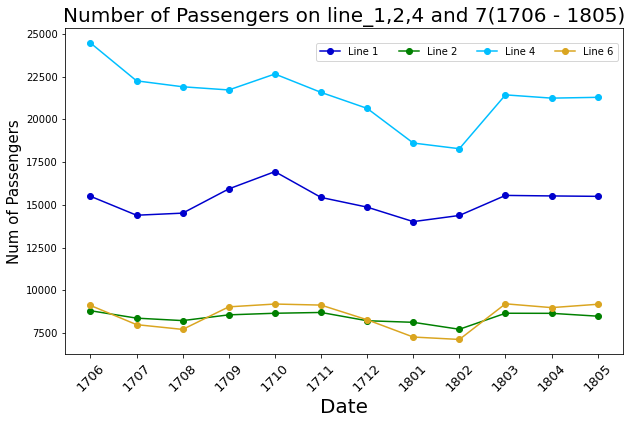

In [32]:
plt.figure(figsize = (10, 6))
plt.plot(df_u_sum.index, df_u_sum[Line_1], marker = 'o', color = 'mediumblue')
plt.plot(df_u_sum.index, df_u_sum[Line_2], marker = 'o', color = 'green')
plt.plot(df_u_sum.index, df_u_sum[Line_4], marker = 'o', color = 'deepskyblue')
plt.plot(df_u_sum.index, df_u_sum[Line_6], marker = 'o', color = 'goldenrod')
plt.title('Number of Passengers on line_1,2,4 and 7(1706 - 1805)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num of Passengers', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13)
plt.legend(df_u_sum.columns, loc = (0.45, 0.9), ncol = 4)
plt.show()

# 신림선 개통

In [17]:
Line_1 = translate('1호선')
Line_2 = translate('2호선')
Line_7 = translate('7호선')
Line_9 = translate('9호선')

#1호선 데이터프레임
df_1_s = df_subway[df_subway['역명'].isin(['신길','대방','노량진'])]
df_1_s = df_1_s.set_index('역명')
c_list = list(df_1_s.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_1_s.columns = new_c_list
mean_data = list(df_1_s.mean().values)
df_1_s.loc[len(df_1_s)] = mean_data # 월별 역 승하차 평균 인원
df_1_s.rename(index = {3: Line_1}, inplace = True)
df_1_s = df_1_s.astype('int') # 타입 바꿔줌
df_1_s_sum = df_1_s.iloc[[-1]].T

#2호선 데이터프레임
df_2_s = df_subway[df_subway['역명'].isin(['신대방','신림','봉천','서울대입구'])]
df_2_s = df_2_s.set_index('역명')
c_list = list(df_2_s.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_2_s.columns = new_c_list
mean_data = list(df_2_s.mean().values)
df_2_s.loc[len(df_2_s)] = mean_data # 월별 역 승하차 평균 인원
df_2_s.rename(index = {4: Line_2}, inplace = True)
df_2_s = df_2_s.astype('int') # 타입 바꿔줌
df_2_s_sum = df_2_s.iloc[[-1]].T

#7호선 데이터프레임
df_7_s = df_subway[df_subway['역명'].isin(['신풍','보라매','신대방삼거리','장승배기','상도'])]
df_7_s = df_7_s.set_index('역명')
c_list = list(df_7_s.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_7_s.columns = new_c_list
mean_data = list(df_7_s.mean().values)
df_7_s.loc[len(df_7_s)] = mean_data # 월별 역 승하차 평균 인원
df_7_s.rename(index = {5: Line_7}, inplace = True)
df_7_s = df_7_s.astype('int') # 타입 바꿔줌
df_7_s_sum = df_7_s.iloc[[-1]].T

#9호선 데이터프레임
df_9_s = df_subway[df_subway['역명'].isin(['국회의사당','여의도','샛강'])]
df_9_s = df_9_s.set_index('역명')
c_list = list(df_9_s.columns)
new_c_list = list()
for name in c_list:
    name = name.split('_')[-1]
    new_c_list.append(name)
df_9_s.columns = new_c_list
mean_data = list(df_9_s.mean().values)
df_9_s.loc[len(df_9_s)] = mean_data # 월별 역 승하차 평균 인원
df_9_s.rename(index = {3: Line_9}, inplace = True)
df_9_s = df_9_s.astype('int') # 타입 바꿔줌
df_9_s_sum = df_9_s.iloc[[-1]].T

df_s_sum_1 = pd.merge(df_1_s_sum, df_2_s_sum, how = 'outer', left_index = True, right_index = True).loc['2203':'2212']
df_s_sum_2 = pd.merge(df_7_s_sum, df_9_s_sum, how = 'outer', left_index = True, right_index = True).loc['2203':'2212']
df_s_sum= pd.merge(df_s_sum_1,df_s_sum_2, how = 'outer', left_index = True, right_index = True)

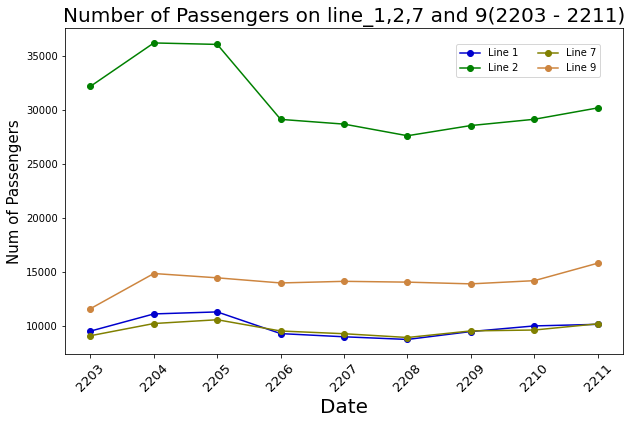

In [18]:
plt.figure(figsize = (10, 6))
plt.plot(df_s_sum.index, df_s_sum[Line_1], marker = 'o', color = 'mediumblue')
plt.plot(df_s_sum.index, df_s_sum[Line_2], marker = 'o', color = 'green')
plt.plot(df_s_sum.index, df_s_sum[Line_7], marker = 'o', color = 'olive')
plt.plot(df_s_sum.index, df_s_sum[Line_9], marker = 'o', color = 'peru')
plt.title('Number of Passengers on line_1,2,7 and 9(2203 - 2211)', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num of Passengers', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 13)
plt.legend(df_s_sum.columns, loc = (0.7, 0.85), ncol = 2)
plt.show()

## 결론

## 1.신설 노선의 영향이 상반된 영향을 미치는 이유 분석
### - +영향
#### - 신설 노선의 개통을 통한 신규 승객으로 인한 기존 환승역 승객 증가
#### - 다른 대중교통 수단에서 개통된 신설 노선을 활용하는 경우 증가

### - -영향
#### - 신설 노선 개설로 인해 기존 노선에서 타 교통수단으로 환승할 필요 사라짐
#### - 타 교통수단으로 환승하던 승객이 신설 노선 이용하게 됨 -> 환승 승객 미반영 영향으로 승객 수 감소 추세처럼 보임